In [57]:
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

Define a function to create the model for our CNN. The input consists of images shaped 16x15 pixels each. The initial model consists of a single convolutional layer, followed by a max pooling layer, then a flattening layer, ending with two fully connected layers.

In [104]:
def define_model():
    input_shape = (16, 15, 1)
    model = Sequential([
        Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
        MaxPool2D(pool_size = 2),
        Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = 2),
        Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = 2),
        Flatten(),
        Dense(units = 22, activation = 'relu'),
        Dense(units = 10, activation = 'softmax')
    ])
    return model

In [105]:
def compile_model(model):
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [106]:
def train_model(model, x, y, epochs):
    model.fit(x, y, shuffle = True, epochs = epochs)

In [95]:
def load_data(): 
    raw_data = []
    with open('./ProjectDigits_materials/mfeat-pix.txt', 'r') as f:
        for line in f:
            pixels = []
            for c in line:
                if c.isdigit():
                    pixels.append(int(c))
            raw_data.append(pixels)
    raw_data = np.array(raw_data)
    return raw_data

In [110]:
def normalize_data(data):
    data.astype(float)
    return data / 6

In [113]:
data = load_data()
data = normalize_data(data)
data.shape

(2000, 240)

In [114]:
def n_image_in_category(data) -> int:
    return int(data.shape[0] / 10)

In [115]:
# split the data into train and test sets
n_images = n_image_in_category(data)
split = int(n_images / 2)

#random split
# split_indices = [row * n_images + np.random.choice(n_images, split, replace=False) for row in range(10)]

# real split
split_indices = [np.arange(i * 200, i * 200 + 100) for i in range(10)]

split_indices = np.array(split_indices).flatten()
train_data = data[split_indices]
test_data = np.delete(data, split_indices, axis=0)

In [116]:
#sanity checks
assert (n_images == 200 and split == 100)
assert (train_data.shape == test_data.shape == (1000, 240))

In [117]:
# Reshape variables to (16 x 15 x 1)
train_data = train_data.reshape(train_data.shape[0], 16, 15, 1)
test_data = test_data.reshape(test_data.shape[0], 16, 15, 1)

# Create train- and test labels, then use one-hot encoding on them
train_images = n_image_in_category(train_data)
train_labels = np.zeros((train_data.shape[0], 10), dtype=np.int64)
for i in range(10):
    for j in range(train_images):
        train_labels[i * train_images + j, i] = 1

test_images = n_image_in_category(test_data)
test_labels = np.zeros((test_data.shape[0], 10), dtype=np.int64)
for i in range(10):
    for j in range(test_images):
        test_labels[i * test_images + j, i] = 1

In [118]:
model = define_model()
compile_model(model)

In [119]:
history = model.fit(train_data, train_labels, validation_data = (test_data, test_labels), batch_size = 20, epochs = 50)
model.save("cnn_digits.model")

Epoch 1/50
50/50 [==============================] - 1s 6ms/step - loss: 1.7594 - accuracy: 0.3880 - val_loss: 0.9095 - val_accuracy: 0.7170
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5352 - accuracy: 0.8380 - val_loss: 0.3248 - val_accuracy: 0.9000
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.2084 - accuracy: 0.9510 - val_loss: 0.2284 - val_accuracy: 0.9330
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1518 - accuracy: 0.9580 - val_loss: 0.1649 - val_accuracy: 0.9560
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1004 - accuracy: 0.9720 - val_loss: 0.1420 - val_accuracy: 0.9650
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.0780 - accuracy: 0.9820 - val_loss: 0.1837 - val_accuracy: 0.9470
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.0763 - accuracy: 0.9790 - val_loss: 0.1026 - val_accuracy: 0.9720
Epoch 8/50
50/50 [==

INFO:tensorflow:Assets written to: cnn_digits.model\assets


Text(0.5, 1.0, 'Accuracy')

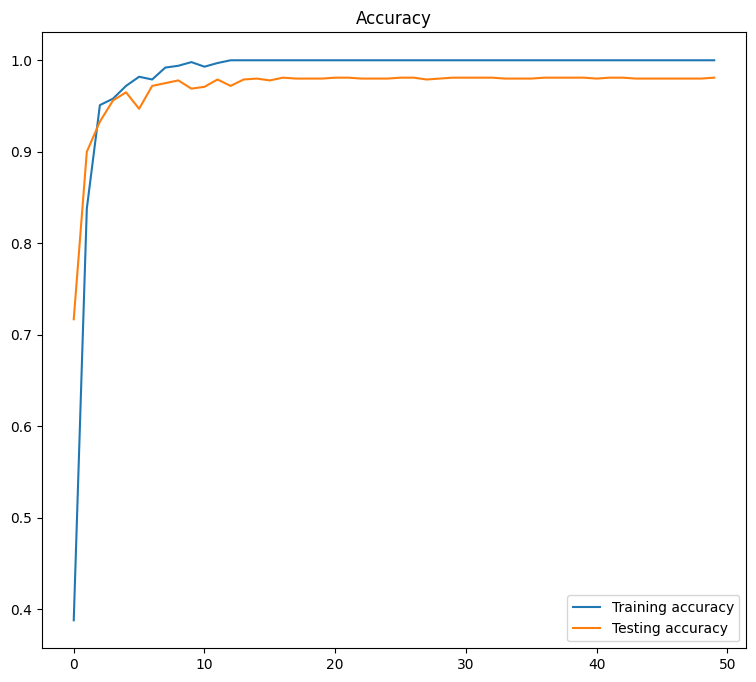

In [120]:
fig = plt.figure(figsize=(20, 8))

acc_plot = fig.add_subplot(121)
acc_plot.plot(history.history['accuracy'], label = str('Training accuracy'))
acc_plot.plot(history.history['val_accuracy'], label = str('Testing accuracy'))
plt.legend()
plt.title('Accuracy')